In [1]:
import pandas as pd
import matplotlib.pyplot as plt
country = ["Paris", "Spain"]
population = ["11","12"]
list_label = ["country", "population"]
list_col = [country, population]
zipped = list(zip(list_label, list_col))
data_dict = dict(zipped)
df = pd.DataFrame(data_dict)
df

country population
0   Paris         11
1   Spain         12

In [2]:
df["capital"] = ["madrid", "paris"]
df

country population capital
0   Paris         11  madrid
1   Spain         12   paris

In [3]:
df["income"] = 0
df

country population capital  income
0   Paris         11  madrid       0
1   Spain         12   paris       0

In [4]:
data = pd.read_csv('../cleaning/pokemon.csv')
data1=data   # also we will use data to fill missing value so I assign it to data1 variable
data1["Type 2"].dropna(inplace = True)  # inplace = True means we do not assign it to new variable. Changes automatically assigned to data
# So does it work ?

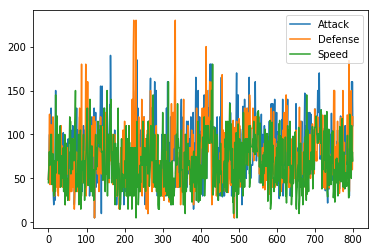

In [5]:
data1 = data.loc[:,["Attack","Defense","Speed"]]
data1.plot()


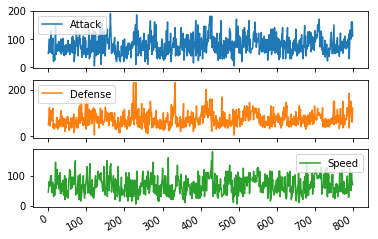

In [6]:
data1.plot(subplots = True)
plt.show()

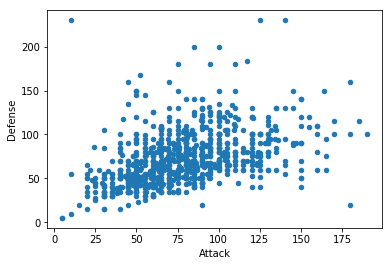

In [7]:
data1.plot(kind = "scatter", x = "Attack", y = "Defense")
plt.show()

C:\Users\trill\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


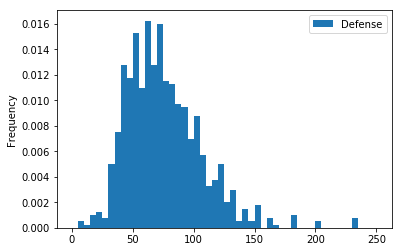

In [8]:
data1.plot(kind = "hist",y = "Defense",bins = 50,range= (0,250),normed = True)


C:\Users\trill\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


<module 'matplotlib.pyplot' from 'C:\\Users\\trill\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

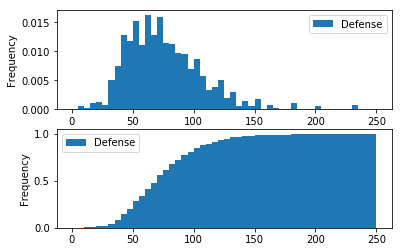

In [9]:
fig, axes = plt.subplots(nrows=2,ncols=1)
data1.plot(kind = "hist",y = "Defense",bins = 50,range= (0,250),normed = True,ax = axes[0])
data1.plot(kind = "hist",y = "Defense",bins = 50,range= (0,250),normed = True,ax = axes[1],cumulative = True)
plt.savefig('graph.png')
plt

In [10]:
time_list = ["1992-03-08","1992-04-12"]
print(type(time_list[1])) # As you can see date is string
# however we want it to be datetime object
datetime_object = pd.to_datetime(time_list)
print(type(datetime_object))

<class 'str'>
<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


In [11]:
# close warning
import warnings
warnings.filterwarnings("ignore")
# In order to practice lets take head of pokemon data and add it a time list
data2 = data.head()
date_list = ["1992-01-10","1992-02-10","1992-03-10","1993-03-15","1993-03-16"]
datetime_object = pd.to_datetime(date_list)
data2["date"] = datetime_object
# lets make date as index
data2= data2.set_index("date")
data2

#           Name Type 1  Type 2  HP  Attack  Defense  Sp. Atk  \
date                                                                        
1992-01-10  1      Bulbasaur  Grass  Poison  45      49       49       65   
1992-02-10  2        Ivysaur  Grass  Poison  60      62       63       80   
1992-03-10  3       Venusaur  Grass  Poison  80      82       83      100   
1993-03-15  4  Mega Venusaur  Grass  Poison  80     100      123      122   
1993-03-16  5     Charmander   Fire     NaN  39      52       43       60   

            Sp. Def  Speed  Generation  Legendary  
date                                               
1992-01-10       65     45           1      False  
1992-02-10       80     60           1      False  
1992-03-10      100     80           1      False  
1993-03-15      120     80           1      False  
1993-03-16       50     65           1      False

In [12]:
# Now we can select according to our date index
print(data2.loc["1993-03-16"])
print(data2.loc["1992-03-10":"1993-03-16"])

#                      5
Name          Charmander
Type 1              Fire
Type 2               NaN
HP                    39
Attack                52
Defense               43
Sp. Atk               60
Sp. Def               50
Speed                 65
Generation             1
Legendary          False
Name: 1993-03-16 00:00:00, dtype: object
            #           Name Type 1  Type 2  HP  Attack  Defense  Sp. Atk  \
date                                                                        
1992-03-10  3       Venusaur  Grass  Poison  80      82       83      100   
1993-03-15  4  Mega Venusaur  Grass  Poison  80     100      123      122   
1993-03-16  5     Charmander   Fire     NaN  39      52       43       60   

            Sp. Def  Speed  Generation  Legendary  
date                                               
1992-03-10      100     80           1      False  
1993-03-15      120     80           1      False  
1993-03-16       50     65           1      False  


In [15]:
data2.resample("A").mean()

#         HP     Attack  Defense    Sp. Atk    Sp. Def  \
date                                                                   
1992-12-31  2.0  61.666667  64.333333     65.0  81.666667  81.666667   
1993-12-31  4.5  59.500000  76.000000     83.0  91.000000  85.000000   

                Speed  Generation  Legendary  
date                                          
1992-12-31  61.666667         1.0      False  
1993-12-31  72.500000         1.0      False

In [16]:
data2

#           Name Type 1  Type 2  HP  Attack  Defense  Sp. Atk  \
date                                                                        
1992-01-10  1      Bulbasaur  Grass  Poison  45      49       49       65   
1992-02-10  2        Ivysaur  Grass  Poison  60      62       63       80   
1992-03-10  3       Venusaur  Grass  Poison  80      82       83      100   
1993-03-15  4  Mega Venusaur  Grass  Poison  80     100      123      122   
1993-03-16  5     Charmander   Fire     NaN  39      52       43       60   

            Sp. Def  Speed  Generation  Legendary  
date                                               
1992-01-10       65     45           1      False  
1992-02-10       80     60           1      False  
1992-03-10      100     80           1      False  
1993-03-15      120     80           1      False  
1993-03-16       50     65           1      False

In [18]:
# read data
data = pd.read_csv('../cleaning/pokemon.csv')
data= data.set_index("#")
data.head()

Name Type 1  Type 2  HP  Attack  Defense  Sp. Atk  Sp. Def  Speed  \
#                                                                               
1      Bulbasaur  Grass  Poison  45      49       49       65       65     45   
2        Ivysaur  Grass  Poison  60      62       63       80       80     60   
3       Venusaur  Grass  Poison  80      82       83      100      100     80   
4  Mega Venusaur  Grass  Poison  80     100      123      122      120     80   
5     Charmander   Fire     NaN  39      52       43       60       50     65   

   Generation  Legendary  
#                         
1           1      False  
2           1      False  
3           1      False  
4           1      False  
5           1      False

In [47]:
data1 = data.set_index(["Type 1","Type 2"]) 
data1.head(100)

Name   HP  Attack  Defense  Sp. Atk  Sp. Def  \
Type 1   Type 2                                                              
Grass    Poison          Bulbasaur   45      49       49       65       65   
         Poison            Ivysaur   60      62       63       80       80   
         Poison           Venusaur   80      82       83      100      100   
         Poison      Mega Venusaur   80     100      123      122      120   
Fire     NaN            Charmander   39      52       43       60       50   
         NaN            Charmeleon   58      64       58       80       65   
         Flying          Charizard   78      84       78      109       85   
         Dragon   Mega Charizard X   78     130      111      130       85   
         Flying   Mega Charizard Y   78     104       78      159      115   
Water    NaN              Squirtle   44      48       65       50       64   
         NaN             Wartortle   59      63       80       65       80   
         NaN             Blastoise   79      83      100       85      105   
         NaN        Mega Blastoise   79     103      120      135      115   
Bug      NaN              Caterpie   45      30       35       20       20   
         NaN               Metapod   50      20       55       25       25   
         Flying         Butterfree   60      45       50       90       80   
         Poison             Weedle   40      35       30       20       20   
         Poison             Kakuna   45      25       50       25       25   
         Poison           Beedrill   65      90       40       45       80   
         Poison      Mega Beedrill   65     150       40       15       80   
Normal   Flying             Pidgey   40      45       40       35       35   
         Flying          Pidgeotto   63      60       55       50       50   
         Flying            Pidgeot   83      80       75       70       70   
         Flying       Mega Pidgeot   83      80       80      135       80   
         NaN               Rattata   30      56       35       25       35   
         NaN              Raticate   55      81       60       50       70   
         Flying            Spearow   40      60       30       31       31   
         Flying             Fearow   65      90       65       61       61   
Poison   NaN                 Ekans   35      60       44       40       54   
         NaN                 Arbok   60      85       69       65       79   
...                            ...  ...     ...      ...      ...      ...   
Psychic  NaN              Alakazam   55      50       45      135       95   
         NaN         Mega Alakazam   55      50       65      175       95   
Fighting NaN                Machop   70      80       50       35       35   
         NaN               Machoke   80     100       70       50       60   
         NaN               Machamp   90     130       80       65       85   
Grass    Poison         Bellsprout   50      75       35       70       30   
         Poison         Weepinbell   65      90       50       85       45   
         Poison         Victreebel   80     105       65      100       70   
Water    Poison          Tentacool   40      40       35       50      100   
         Poison         Tentacruel   80      70       65       80      120   
Rock     Ground            Geodude   40      80      100       30       30   
         Ground           Graveler   55      95      115       45       45   
         Ground              Golem   80     120      130       55       65   
Fire     NaN                Ponyta   50      85       55       65       65   
         NaN              Rapidash   65     100       70       80       80   
Water    Psychic          Slowpoke   90      65       65       40       40   
         Psychic           Slowbro   95      75      110      100       80   
         Psychic      Mega Slowbro   95      75      180      130       80   
Electric Steel           Magnemite   25      35     

ValueError: No axis named 2 for object type <class 'pandas.core.frame.DataFrame'>